# Installing Packages

In [1]:
%pip install numpy
%pip install tensorflow==2.10.0
%pip install tensorflow-gpu==2.10.0
%pip install matplotlib
%pip install scikit-image
%pip install scikit-learn
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Common imports
import numpy as np;
import random;
import joblib;

# import other code files
from setup import load_images_paths, load_images, unpack;
from performance import printConfMtx;
from MLP import MLP;

# to make this notebook's output stable across runs
np.random.seed(42);

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt;
plt.rcParams['axes.labelsize'] = 14;
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12;

# import Global variables
import constants;

# Setup

## Load the Images

### Load the Paths of the Images

In [3]:
image_paths = load_images_paths();
YOR_TEST_SAMPLES = image_paths["YOR_TEST_SAMPLES"];
YOR_TEST_LABELS = image_paths["YOR_TEST_LABELS"];
YOR_TRAIN_SAMPLES = image_paths["YOR_TRAIN_SAMPLES"];
YOR_TRAIN_LABELS = image_paths["YOR_TRAIN_LABELS"];

CAL_TEST_SAMPLES = image_paths["CAL_TEST_SAMPLES"];
CAL_TEST_LABELS = image_paths["CAL_TEST_LABELS"];
CAL_TRAIN_SAMPLES = image_paths["CAL_TRAIN_SAMPLES"];
CAL_TRAIN_LABELS = image_paths["CAL_TRAIN_LABELS"];

print("In YOR dataset...")
print(f"Number of Samples in test set: {len(YOR_TEST_SAMPLES)}");
print(f"Number of Labels in test set: {len(YOR_TEST_LABELS)}");
print(f"Number of Samples in training set: {len(YOR_TRAIN_SAMPLES)}");
print(f"Number of Labels in training set: {len(YOR_TRAIN_LABELS)}");

print();

print("In CAL dataset...")
print(f"Number of Samples in test set: {len(CAL_TEST_SAMPLES)}");
print(f"Number of Labels in test set: {len(CAL_TEST_LABELS)}");
print(f"Number of Samples in training set: {len(CAL_TRAIN_SAMPLES)}");
print(f"Number of Labels in training set: {len(CAL_TRAIN_LABELS)}");

In YOR dataset...
Number of Samples in test set: 158
Number of Labels in test set: 158
Number of Samples in training set: 334
Number of Labels in training set: 334

In CAL dataset...
Number of Samples in test set: 237
Number of Labels in test set: 237
Number of Samples in training set: 253
Number of Labels in training set: 253


In [4]:
print("Inspecting the path in each set...");
print(YOR_TEST_SAMPLES[random.randint(0, len(YOR_TEST_SAMPLES)-1)]);
print(YOR_TRAIN_SAMPLES[random.randint(0, len(YOR_TRAIN_SAMPLES)-1)]);
print(CAL_TEST_SAMPLES[random.randint(0, len(CAL_TEST_SAMPLES)-1)]);
print(CAL_TRAIN_SAMPLES[random.randint(0, len(CAL_TRAIN_SAMPLES)-1)]);

Inspecting the path in each set...
.\stonefiles\yor\set0\Yor_11-specimen-i001-s124.jpg
.\stonefiles\yor\set1\Yor_105-specimen-i002-s125.jpg
.\stonefiles\cal\set0\Cal_2-specimen-i005-s125.jpg
.\stonefiles\cal\set1\Cal_52-specimen-i004-s125.jpg


### Load the actual images (from the obtained paths) into numpy arrays

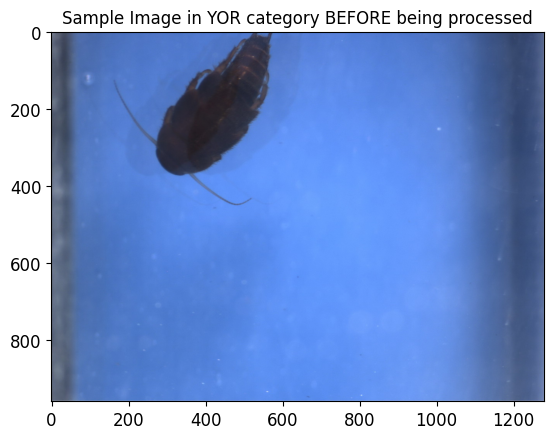

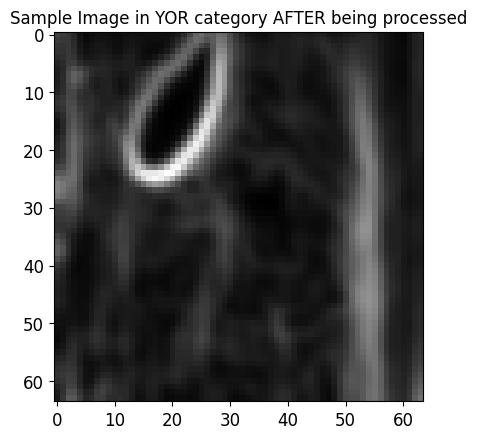

Type of the test samples structure: <class 'numpy.ndarray'>
Shape of the test samples array: (158, 64, 64)
Dimensionality of the test samples array: 3


In [5]:
YOR_TEST_SAMPLES = load_images(YOR_TEST_SAMPLES, constants.YOR.upper());
print(f"Type of the test samples structure: {type(YOR_TEST_SAMPLES)}");
print(f"Shape of the test samples array: {YOR_TEST_SAMPLES.shape}");
print(f"Dimensionality of the test samples array: {YOR_TEST_SAMPLES.ndim}");

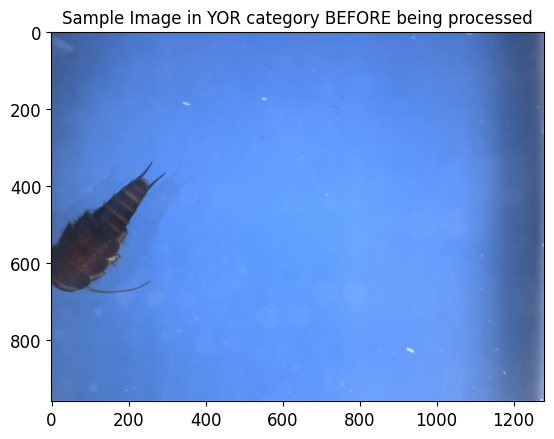

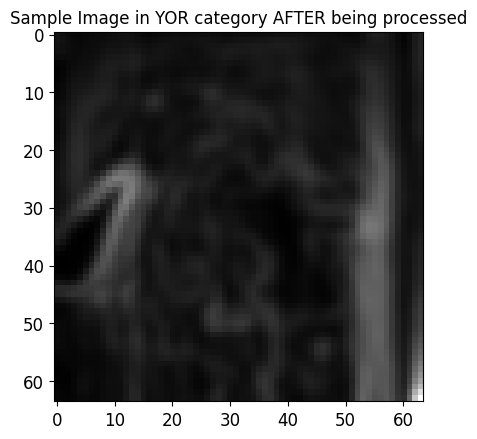

Type of the training samples structure: <class 'numpy.ndarray'>
Shape of the training samples array: (334, 64, 64)
Dimensionality of the training samples array: 3


In [6]:
YOR_TRAIN_SAMPLES = load_images(YOR_TRAIN_SAMPLES, constants.YOR.upper());
print(f"Type of the training samples structure: {type(YOR_TRAIN_SAMPLES)}");
print(f"Shape of the training samples array: {YOR_TRAIN_SAMPLES.shape}");
print(f"Dimensionality of the training samples array: {YOR_TRAIN_SAMPLES.ndim}");

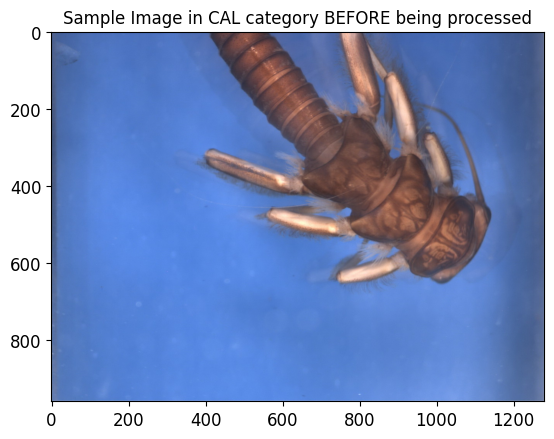

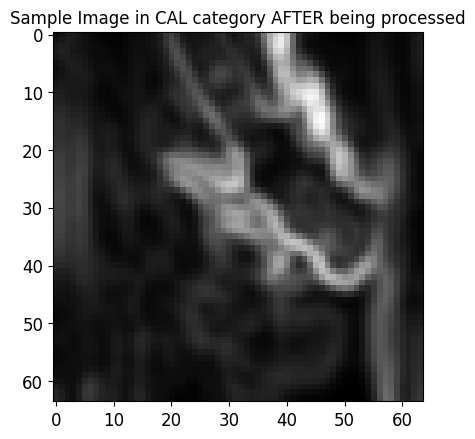

Type of the test samples structure: <class 'numpy.ndarray'>
Shape of the test samples array: (237, 64, 64)
Dimensionality of the test samples array: 3


In [7]:
CAL_TEST_SAMPLES = load_images(CAL_TEST_SAMPLES, constants.CAL.upper());
print(f"Type of the test samples structure: {type(CAL_TEST_SAMPLES)}");
print(f"Shape of the test samples array: {CAL_TEST_SAMPLES.shape}");
print(f"Dimensionality of the test samples array: {CAL_TEST_SAMPLES.ndim}");

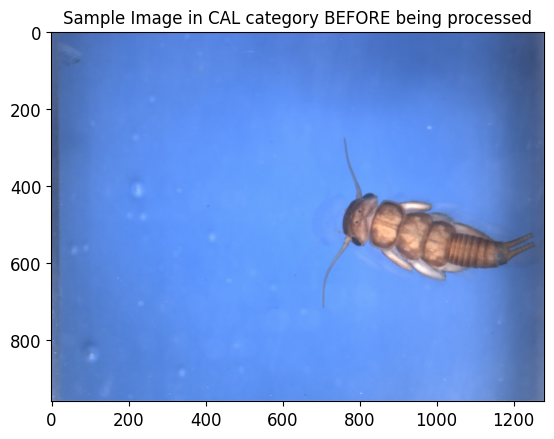

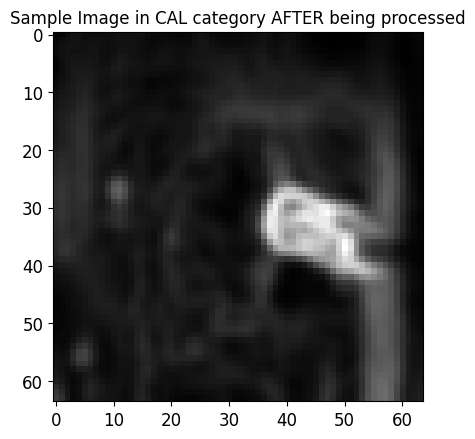

Type of the training samples structure: <class 'numpy.ndarray'>
Shape of the training samples array: (253, 64, 64)
Dimensionality of the training samples array: 3


In [8]:
CAL_TRAIN_SAMPLES = load_images(CAL_TRAIN_SAMPLES, constants.CAL.upper());
print(f"Type of the training samples structure: {type(CAL_TRAIN_SAMPLES)}");
print(f"Shape of the training samples array: {CAL_TRAIN_SAMPLES.shape}");
print(f"Dimensionality of the training samples array: {CAL_TRAIN_SAMPLES.ndim}");

#### Put those into the appropriate training set and testing set for modelling

In [9]:
X_train = np.concatenate((YOR_TRAIN_SAMPLES, CAL_TRAIN_SAMPLES));
y_train = np.concatenate((YOR_TRAIN_LABELS, CAL_TRAIN_LABELS));
X_test = np.concatenate((YOR_TEST_SAMPLES, CAL_TEST_SAMPLES));
y_test = np.concatenate((YOR_TEST_LABELS, CAL_TEST_LABELS));

In [10]:
print(f"Shape of Training Set SamplesArray: {X_train.shape}");
print(f"Dimentionality of Training Set Samples Array: {X_train.ndim}");
print();
print(f"Shape of Training Set Labels Array: {y_train.shape}");
print(f"Dimentionality of Training Set Labels Array: {y_train.ndim}");

print();

print(f"Shape of Test Set SamplesArray: {X_test.shape}");
print(f"Dimentionality of Test Set Samples Array: {X_test.ndim}");
print();
print(f"Shape of Test Set Labels Array: {y_test.shape}");
print(f"Dimentionality of Test Set Labels Array: {y_test.ndim}");

Shape of Training Set SamplesArray: (587, 64, 64)
Dimentionality of Training Set Samples Array: 3

Shape of Training Set Labels Array: (587,)
Dimentionality of Training Set Labels Array: 1

Shape of Test Set SamplesArray: (395, 64, 64)
Dimentionality of Test Set Samples Array: 3

Shape of Test Set Labels Array: (395,)
Dimentionality of Test Set Labels Array: 1


In [11]:
# Save Images to files (for easier debugging)
joblib.dump(X_train, "X_train.pkl");
joblib.dump(X_test, "X_test.pkl");
joblib.dump(y_train, "y_train.pkl");
joblib.dump(y_test, "y_test.pkl");

In [12]:
# Test if the .pkl files store the image samples correctly
# X_train
unpackContent = unpack("X_train.pkl");
if (len(np.unique(unpackContent == X_train)) == 1 and np.unique(unpackContent == X_train).__contains__(True)):
    print("X_train in file is correct.");

# X_test
unpackContent = unpack("X_test.pkl");
if (len(np.unique(unpackContent == X_test)) == 1 and np.unique(unpackContent == X_test).__contains__(True)):
    print("X_test in file is correct.");

# y_train
unpackContent = unpack("y_train.pkl");
if (len(np.unique(unpackContent == y_train)) == 1 and np.unique(unpackContent == y_train).__contains__(True)):
    print("y_train in file is correct.");

# y_test
unpackContent = unpack("y_test.pkl");
if (len(np.unique(unpackContent == y_test)) == 1 and np.unique(unpackContent == y_test).__contains__(True)):
    print("y_test in file is correct.");

X_train in file is correct.
X_test in file is correct.
y_train in file is correct.
y_test in file is correct.


In [13]:
X_train = unpack("X_train.pkl");
X_test = unpack("X_test.pkl");
y_train = unpack("y_train.pkl");
y_test = unpack("y_test.pkl");

# Multi-Layer Perceptron

In [14]:
# Load the Model
mlpModel = MLP();
mlpModel.model

INFO:tensorflow:Assets written to: ram://346a87a1-25b8-4a49-9ede-63ae78ff039b/assets
INFO:tensorflow:Assets written to: ram://c899c488-5ce8-4194-a4c0-a155a2b146f1/assets


In [15]:
# Normalize data
X_train, y_train, X_test, y_test = mlpModel.normalize(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

In [16]:
# summarize the model
mlpModel.model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 262,273
Trainable params: 262,273
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the Model
history = mlpModel.train(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
);
mlpModel.model

INFO:tensorflow:Assets written to: ram://917f1817-a76a-4edb-a9d7-4cf683f74ea7/assets
13/13 [==============================] - 0s 2ms/step - loss: 0.0754 - acc: 0.9848
Test accuracy: 98.48%


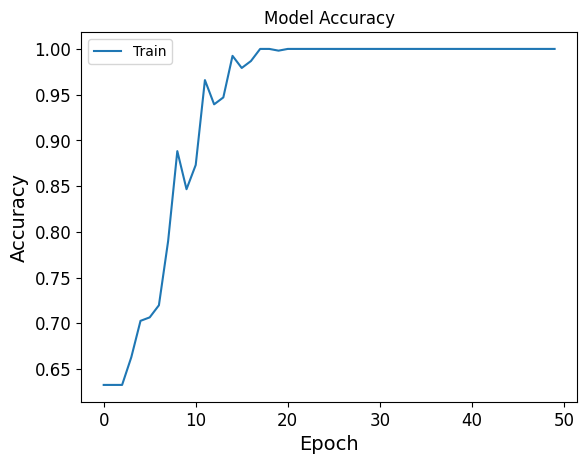

In [19]:
# Plot the Learning Curve
MLP.plotLearningCurve(history);